# Conditions d'utilisation 
Pour que **InPoDa** fonctionne correctement vérifiez que les conditions suivantes sont réunies :
- Installation des modules : ```Pandas```, ```Textblob```, (```Spacy```?, ```Deep_translator```?, ```Gradio```?)
- Le fichier ***"aitweets.json"*** doit être dans le même dossier que  ce notebook "**InPoDa POO Desmares-Desfontaines**"
- Mise en garde : l'éxécution du script à été soigneusement pensé et ordonné. L'éxécution d'une fonction une seconde fois risque de mener à une erreur car le type des variables manipulées aura changer entre temps. En effet les variables principales (**DicoA**, **DicoH**, **DFP**), sont converties en objet **Inpoda** vers la fin du script. Elles ne sont donc plus compatibles à certaines opérations (comme .keys() par exemple) 

# Installation des modules
Pour commencer on s'assure que tous les modules nécessaires à InPoDa sont correctement installés.
On s'assure donc de l'installation des modules : ```Pandas``` , ```Textblob``` , ```Spacy``` , ```Deep_translator``` , ```Gramex``` , ```Gradio```

In [57]:
!pip install os
!pip install pandas  
!pip install textblob
!pip install spacy
!pip install deep_translator
!pip install gramex
!pip install gradio

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


# Supression des caractères spéciaux

Afin de correctement suprimer les caractères spéciaux de tous les tweets de la base de donnée on commence par suprimer les caractères spéciaux. 
De plus dans le cas spécifique de la base de données de tweets on utilise des expressions régulière afin de nettoyer au maximum les tweets et d'éviter tout désagrément pour les analyses qui seront réalisées par la suite.

In [58]:
def SuprCaracterSpe(Chaine=str):  # Entrée : 'str' (le tweet brut)
# On suprime les caractères spéciaux et éléments suprflus du tweet

    ChaineNettoyee = ''
    indice = 0

    while indice < len(Chaine):
        if (Chaine[indice] == 'R') and (indice < len(Chaine)-2) and (Chaine[indice] + Chaine[indice+1] == 'RT'): # On suprime les "RT"
            indice += 3
            while (indice < len(Chaine)-1) and Chaine[indice] != ' ':
                indice+=1
            ChaineNettoyee += ' '
            indice += 1
        
        elif (Chaine[indice] == 'h') and (indice < len(Chaine)-2) and (Chaine[indice] + Chaine[indice+1:indice+4] == 'http'): # On suprime les URL
            indice += 4
            while (indice < len(Chaine)-1) and Chaine[indice] != ' ':
                indice+=1
            ChaineNettoyee += ' '
            indice += 1

        elif (Chaine[indice].isalnum() == True):
            ChaineNettoyee += Chaine[indice]
            indice += 1

        elif (Chaine[indice] == "\ "[:-1]) and (indice < len(Chaine)-2) and (Chaine[indice] + Chaine[indice+1] == '\n'): # On suprime les sauts de ligne
            ChaineNettoyee += ' '
            indice += 1

        elif (Chaine[indice] == '@') and (indice < len(Chaine)-2):  # On suprime les pseudonymes (donc les arobases) 
            indice += 1
            while (indice < len(Chaine)-1) and Chaine[indice] != ' ':
                indice += 1
            ChaineNettoyee += ' '
            indice += 1
            
        else:
            ChaineNettoyee += ' '
            indice += 1
    return ChaineNettoyee     # Sortie : 'str' (Le tweet sans caractère spéciaux)

# Topics
°Cette section est terminée mais pour des raisons de complexitée technique elle n'est pas connectée au reste°
°En effet l'analyse des sujets d'un seul tweet prend environ 3 secondes... ce qui est énorme à l'échechelle de la base de données. Les fonctions relatives aux Topics sont donc fonctionnelles mais bien trop longues.°

In [59]:
def Traduction(text):  # Entrée : 'str'
    # On traduit le text
    from deep_translator import GoogleTranslator
    traduction = GoogleTranslator(source = 'auto', target='en').translate(text)
    text = traduction
    return(text)     # Sortie : 'str'

In [60]:
def analyse_sujet_tweet(text): #prends en argument un tweet nettoyé de tous caractères spéciaux
    from spacy import load
    # Cette première partie permet de faire une analyse du sujet, fonctionelle pour toutes les langues.
    # Si le tweet est écrit dans une autre langue que l'anglais, on le traduit d'abord pour rendre l'analyse fonctionelle.
    #langue = detect(text)     

    #traduction = GoogleTranslator(source = 'auto', target='en').translate(text)
    #text = traduction
    #print(text)

    nlp = load('en_core_web_sm')       # creation d'un objet spacy
    doc = nlp(text)                          # rends le texte utilisable pour l'ordinateur
    sujets = []

    for sent in doc.sents:                   # iterate over the sentences in the text
        for ent in sent.ents:                # iterate over the named entities in the sentence
            sujets.append(ent.text)          # add the entity to the list of main topics

            #if "artificial intelligence" in ent:
                #sujets.append('artificial intelligence')

    return sujets # Sortie : 'list' 

In [61]:
def Topics(text): # Entrée : 'str'
    # Topics() analyse et extrait les sujets du tweet 
    return analyse_sujet_tweet(Traduction(text)) # Sortie : 'list'

# Création de la classe ***Tweet***

In [62]:
class Tweet:
    # Cette classe permet d'encapsuler toutes les fonctions d'analyses appliquée à un seul tweet.
    # Le but est ici de pouvoir aisément extraire les données du tweet. 

    def __init__(self, chaine='TweetParDéfaut') :
        # 'chaine' doit être un 'str'
        self.chaine = chaine # Reconversion du Tweet en 'str'

        def Hashtags(chaine=str): # Entrée : 'str'
            # Hashtags() extrait la liste des hashtags du tweet en entrée   
            ListeH = []
            SousChaine = chaine.split()
            
            for elem in SousChaine:
                if elem.startswith('#') and len(elem)>1:
                    elem2 = ''
                    indice = 1
                    while indice < len(elem):
                        if (elem[indice] == '_') or (elem[indice].isalnum() == True):
                            elem2 += elem[indice]
                            indice += 1
                        else:
                            indice = len(elem)
                    ListeH.append(elem[0]+elem2)
            return ListeH   # Sortie : 'list' contenant les '#' du tweet
        
        self.Hashtags = Hashtags(chaine)

        def Arobases(chaine=str): # Entrée : 'str'
            # Arobases() extrait la liste des arobases du tweet en entrée
            ListeA = []
            SousChaine = chaine.split()

            for elem in SousChaine:
                if elem.startswith('@') and len(elem)>1:
                    elem2 = ''
                    indice = 1
                    while indice < len(elem):
                        if (elem[indice] == '_') or (elem[indice].isalnum() == True):
                            elem2 += elem[indice]
                            indice += 1
                        else:
                            indice = len(elem)
                    ListeA.append(elem[0]+elem2)
            return ListeA   # Sortie : 'list' contenant les @ du tweet 

        self.Arobases = Arobases(chaine)

        def Sentiment(Tweet=str): # Entrée : 'str'
            # Sentiment() extrait le sentiment du tweet en entrée
            from textblob import TextBlob
            blob = TextBlob(Tweet)
            polarite = blob.sentiment.polarity

            if polarite > 0:
                return 'Positif'
            elif polarite < 0:
                return 'Negatif'
            else:
                return 'Neutre' # Sortie : 'str' contenant le sentiment du tweet
            
        self.Sentiment = Sentiment(chaine)
    
    def __repr__(self): # On définit ici la représentation de notre objet de classe "Tweet"
        return self.chaine # Sa représentation est sous forme de 'str'   

# Création de la classe ***Inpoda***

In [63]:
class Inpoda:
    # Cette classe permet d'encapsuler toutes les fonctions d'analyses appliquée à la base de données.
    # Le but est ici de pouvoir aisément extraire les données du DataFrame principal (DFP) et de nos deux dictionnaires (DicoA et DicoH). 

    def __init__(self, Dico=None, DF=None):
        if DF is None:    # Si l'objet converti en 'Inpoda' n'est pas un 'DataFrame'
            DF = DataFrame([{"DataFrameParDéfaut": True}])  # On crée un DataFrame par défaut
        elif Dico is None: # Si l'objet converti en 'Inpoda' n'est pas un 'dict'
            Dico = {"DicoParDéfaut": True}   # On crée un Dictionnaire par défaut

        self.Dico = Dico
        assert type(self.Dico) == type({})   # Avant d'aller plus loin on vérifie qu'il n'y a pas d'erreur de type d'objet
        self.DF = DF
        assert type(self.DF) == type(DataFrame())   # Avant d'aller plus loin on vérifie qu'il n'y a pas d'erreur de type d'objet


    def TopKH(self, K=5, DicoH=None):# Entrée : {K : 'int' (si K>0 on aura un tri décroissant, si K<0 on aura un tri croissant)
                                            #    DicoH : 'dict' (Dictionnaire contenant tous les Hashtags de la base de données et leur nombre)}
        # TopKH() élabore un DataFrame contenant le top K des hashtags 
        from pandas import DataFrame
        if (DicoH is None) or (type(DicoH)==Inpoda):   # Si le Dictionnaire n'est pas du bon type on le converti en 'dict'
            DicoH = self.Dico
        
        DFKH = DataFrame(DicoH.items(), columns=['#', 'Nombre de Tweets'])
        if K > 0:
            DFKH = DFKH.sort_values(by='Nombre de Tweets', ascending=False) # On tri le Dataframe selon les valeurs de la deuxième colonne 'Nombre de Tweets' et on precise 'ascending=False' pour l'ordre décroissant
        else:
            DFKH = DFKH.sort_values(by='Nombre de Tweets', ascending=True) # Inversement on tri le DataFrame par ordre Décroissant
        return DFKH.head(abs(K)) # On passe la valeur absolue de K dans la méthode .head() pour s'assurer qu'elle affiche correctement le Top demandé
                # Sortie : 'DataFrame' (de deux colonnes contenant les Utilisateurs mentionnés et le Nombre de fois qu'ils ont été mentionné)


    def TopKU(self, K=5, DFP=None):   # Entrée : {K : 'int' (si K>0 on aura un tri décroissant, si K<0 on aura un tri croissant)
                                     #          DFP : 'DataFrame' (Le DataFrame principal)}
        # TopKU() élabore un DataFrame contenant le top K des utilisateurs qui postent le plus
        from pandas import concat
        if (DFP is None) or (type(DFP)==Inpoda):  # Si le DataFrame n'est pas du bon type on le converti en 'DataFrame'
            DFP = self.DF

        Taille = DFP["RetweetCount"].shape  # On récupère les dimensions de la colonne "RetweetCount" de DFP 
        for i in range(Taille[0]):
            valeur = int(DFP["RetweetCount"].loc[i])  # On converti les 'str' de la colonne "RetweetCount" en entier pour correctement les trier
            DFP["RetweetCount"].loc[i] = valeur       
        
        DFKU = concat([DFP["Utilisateurs"], DFP["RetweetCount"]], axis=1)
        if K > 0:
            DFKU = DFKU.sort_values(by="RetweetCount", ascending=False) # On tri le Dataframe selon les valeurs de la deuxième colonne 'RetweetCount' et on precise 'ascending=False' pour l'ordre décroissant
        else:
            DFKU = DFKU.sort_values(by="RetweetCount", ascending=True) # Inversement on tri le DataFrame par ordre Décroissant
        return DFKU.head(abs(K))  # On passe la valeur absolue de K dans la méthode .head() pour s'assurer qu'elle affiche correctement le Top demandé
         # Sortie : 'DataFrame' (de deux colonnes contenant les Utilisateurs et le Nombre de fois qu'ils ont tweeté) 


    def TopKA(self, K=5, DicoA=None):  # Entrée : {K :'int' (si K>0 on aura un tri décroissant, si K<0 on aura un tri croissant)
                        #          DicoA : 'dict' (Dictionnaire contenant tous les Arobases de la base de données et leur nombre)}
        # TopKA() élabore un DataFrame contenant le top K des utilisateurs les plus mentionnés
        from pandas import DataFrame
        if (DicoA is None) or (type(DicoA)==Inpoda):   # Si le Dictionnaire n'est pas du bon type on le converti en 'dict'
            DicoA = self.Dico

        DFKA = DataFrame(DicoA.items(), columns=['@', 'Nombre de Mentions'])
        if K > 0:
            DFKA = DFKA.sort_values(by='Nombre de Mentions', ascending=False) # On tri le Dataframe selon les valeurs de la deuxième colonne 'Nombre de Mentions' et on precise 'ascending=False' pour l'ordre décroissant
        else:
            DFKA = DFKA.sort_values(by='Nombre de Mentions', ascending=True) # Inversement on tri le DataFrame par ordre Décroissant  
        return DFKA.head(abs(K))  # On passe la valeur absolue de K dans la méthode .head() pour s'assurer qu'elle affiche correctement le Top demandé
            # Sortie : 'DataFrame' (de deux colonnes contenant les Utilisateurs et le Nombre de fois qu'ils ont été mentionnés) 

    def NbPostUtilisateur(self, Utilisateur="Lugol", DFP=None) : # Entrée : {Utilisateur : 'str' (Le Nom de l'utilisateur)
                                                                  #          DFP : 'DataFrame' (DataFrame principal)}
        # NbPostUtilisateur() extrait le nombre de tweets d'un Utilisateur 
        if (DFP is None) or (type(DFP)==Inpoda):  # Si le DataFrame n'est pas du bon type on le converti en 'DataFrame'
            DFP = self.DF

        Taille = DFP.shape
        for i in range(Taille[0]):
            if DFP["Utilisateurs"].loc[i] == Utilisateur:
                return (Utilisateur, DFP["RetweetCount"].loc[i])  
        return (Utilisateur, 0)   # Sortie : 'tuple' (Utilisateur, nombre de Publications)


    def NbPostHashtags(self, hashtag='#ParDéfaut', DicoH=None): # Entrée : { hashtag : 'str' (Le Hashtag recherché)
                                                                #            DicoH : 'dict' (Le dictionnaire des Hastags)}
        # NbPostHashtags() extrait le nombre de tweets mentionnant un hashtag  
        if (DicoH is None) or (type(DicoH)==Inpoda):   # Si le Dictionnaire n'est pas du bon type on le converti en 'dict'
            DicoH = self.Dico

        if hashtag in DicoH:
            return (hashtag, DicoH[hashtag])
        else:
            return (hashtag, 0) # Sortie : 'tuple' (#, nombre de publications dans lequel il est mentionné)
    

    def TweetsUtilisateur(self, Utilisateur="Lugol", DFP=None): # Entrée : { Utilisateur : 'str' (Nom de l'Utilisateur)
                                                                #            DFP : 'DataFrame' (DataFrame principal) }
        # TweetsUtilisateur() élabore un DataFrame contenant tous les tweets de l'Utilisateur 
        from pandas import DataFrame
        if (DFP is None) or (type(DFP)==Inpoda):  # Si le DataFrame n'est pas du bon type on le converti en 'DataFrame'
            DFP = self.DF
        if Utilisateur[0] != "@":
            Utilisateur = "@" + Utilisateur
        
        ExpressionR = 'RT ' + Utilisateur  # On utilise une expression régulière pour savoir si le tweet est un "Retweet ('RT')"
        ListeTweets = []
        Taille = DFP["TweetText"].shape
        for indice in range(Taille[0]):
            tweet = DFP["TweetText"].loc[indice]
            tweet = tweet.chaine   # On accède au tweet sous forme de 'str' avec l'attribut .chaine de la classe Tweet
            if (ExpressionR in tweet) and (tweet[len(ExpressionR)+2:] not in ListeTweets):
                ListeTweets.append(tweet[len(ExpressionR)+2:])
            elif (DFP["Utilisateurs"].loc[indice] == Utilisateur):
                ListeTweets.append(tweet)

        if ListeTweets == []:
            return DataFrame([{"Tweets postés par : " + Utilisateur:"Erreur : Aucun Tweet posté"}])
        else:
            return DataFrame({"Tweets postés par : " + Utilisateur:ListeTweets}) 
                # Sortie : 'DataFrame' contenant les à chaque ligne un tweet de l'utilisateur (Tweet brut) 
                #          (attention l'index des Tweets de DFTU ne correspondent pas à leur index dans DFP)


    def TweetsMentionUtilisateur(self, Utilisateur = "Lugol", DFP = None): # Entrée : { Utilisateur : 'str' (Nom d'Utilisateur)
                                                                           #            DFP : 'DataFrame' (DataFrame principal)
        # TweetsMentionUtilisateur() élabore un DataFrame contenant les tweets mentionnant un utilisateur
        from pandas import DataFrame
        if (DFP is None) or (type(DFP)==Inpoda):  # Si le DataFrame n'est pas du bon type on le converti en 'DataFrame'
            DFP = self.DF

        Taille = DFP.shape
        ListeIndiceTweets = []
        for i in range(Taille[0]):
            ListeA = DFP["@"].loc[i]
            if Utilisateur in ListeA:
                ListeIndiceTweets.append(i)

        DFTMU = DataFrame(DFP["TweetText"].iloc[ListeIndiceTweets])
        DFTMU = DFTMU.rename(columns={"TweetText":"Tweets mentionnant : " + Utilisateur})  # On renomme la colonne pour plus de clarté 
        return DFTMU     # Sortie : 'DataFrame' contenant à chaque ligne les Tweets mentionnant l'Utilisateur, 
                                # l'index de chaque ligne correpond à celui du Tweet brut stocké dans DFP 


    def UtilisateurMentionHashtag(self, Hashtag = "#ParDéfaut", DFP = None): # Entrée : { Hastag : 'str' (Hashtag)
                                             #            DFP : 'DataFrame' (DataFrame principal) }
        # UtilisateruMentionHashtag() élabore un DataFrame contenant les Utilisateurs qui ont mentionné le Hashtag dans leur tweet
        from pandas import DataFrame
        if (DFP is None) or (type(DFP)==Inpoda):  # Si le DataFrame n'est pas du bon type on le converti en 'DataFrame'
            DFP = self.DF

        Taille = DFP.shape
        ListeIndiceTweets = []
        for i in range(Taille[0]):
            ListeH = DFP["#"].loc[i]
            if Hashtag in ListeH:
                ListeIndiceTweets.append(i)

        if ListeIndiceTweets == []:
            return DataFrame([{"Utilisateurs":"Erreur : Votre Hashtag n'existe pas"}])
        else:
            return DataFrame(DFP["Utilisateurs"].iloc[ListeIndiceTweets]) 
              # Sortie : 'DataFrame' contenant à chaque ligne un Utilisateur qui à mentionner le Hashtag dans son tweet, 
              #          l'index correspond à celui de l'Utilisateur dans DFP


    def UtilisateurMentionUtilsateur(self, Utilisateur = "Lugol", DFP = None):  # Entrée : { Utilisateur : 'str' (Nom d'Utilisateur)
                                                                    #            DFP : 'DataFrame' (DataFrame principal)
        # UtilisateruMentionUtilisateur() élabore un DataFrame contenant les Utilisateurs mentionnés par un Utilisateur spécifique
        from pandas import DataFrame
        if (DFP is None) or (type(DFP)==Inpoda):  # Si le DataFrame n'est pas du bon type on le converti en 'DataFrame'
            DFP = self.DF
            
        Taille = DFP.shape
        for i in range(Taille[0]):
            if DFP["Utilisateurs"].loc[i] == Utilisateur:
                return DataFrame({Utilisateur + " a mentionné :":DFP["@"].loc[i]})   
        return DataFrame([{"Utilisateurs":"Erreur : Votre Utilisateur n'existe pas"}]) 
            # Sortie : 'DataFrame'

    def Histogramme(self): # Entrée : 'DataFrame' (On prend en entrée le DataFrame obtenu grâce a l'une des fonction "TopK")
        # Cette fonction affiche l'histogramme du Top-K
        import matplotlib.pyplot as plt
        from pandas import DataFrame
        if type(self)==Inpoda:
            self = self.DF
        assert len(self.columns) == 2 # On s'assure que la DataFrame a deux colonnes

        values = self.iloc[:, 1].tolist()
        labels = self.iloc[:, 0].tolist()
        titre = "Histogramme du Top-K du " + self.columns[1]
        légendeA = self.columns[0]

        plt.bar(labels, values) # Créer l'histogramme
        plt.xlabel(légendeA) # Ajouter des étiquettes et des titres
        plt.ylabel("Nombre d'occurences")
        plt.title(titre)
        plt.xticks(rotation=45, ha="right")  # Rotation des noms pour une meilleure lisibilité
        plt.show() # Affichage de l'Histogramme


    def __repr__(self):     
        if (self.Dico != {"DicoParDéfaut": True}) and (self.Dico != {}):  # On adapte la représentation de notre objet en fonction de son type initial 
            return repr(self.Dico)
        else:
            return repr(self.DF)


# Récupération des Tweets du fichier Json → Json (Zone d'aterrissage)

In [64]:
def ZoneAtterrissage(NomFichier=str):
    # On écrit tous les tweets nettoyés dans un fichier json 
    from json import loads

    with open(NomFichier, 'r') as fs, open("Zone d’atterrissage.json", 'w') as fd:
        ListeTweets = []
        for ligne in fs:
            dicoL = loads(ligne)
            tweet = dicoL["TweetText"] 
            tweetN = SuprCaracterSpe(tweet)  # Suprime tous les caractères spéciaux, les RT et les pseudonymes
            ListeTweets.append(tweetN)
        Taille = len(ListeTweets)
        Début = '{'+'"'+'Tweets'+'"'+':'+'['
        ER1 = '"'     # Utilisation d'expression régulière
        ER2 = '",'
        
        fd.write(Début)
        for i in range(Taille-1):
            ER3 = ER1 + ListeTweets[i] + ER2
            fd.write(ER3)
        ER4 = ER1 + ListeTweets[-1] + ER1
        Fin = ']}'
        fd.write(ER4+Fin)

fichier = "aitweets.json"
ZoneAtterrissage(fichier)

# Récupération des Données du fichier Json → DataFrame ('DFP')

In [65]:
def RecupDonneesP(NomFichier=str):  # Entrée : 'str' 
    # Stockage et analyses préliminaires des données. L'objectif est ici d'élaborer le DataFrame principal sur lequel toutes nos analyses vont reposer.
    from pandas import DataFrame
    from pandas import concat
    from json import loads
    
    with open(NomFichier, 'r') as fs:
        ligne = fs.readline()
        dicoL = loads(ligne) # On charge le dictionnaire contenu à la ligne
        tweet = Tweet(dicoL["TweetText"]) # On converti le tweet ('str') en 'Tweet'
        dicoL["TweetText"] = tweet 
        dicoL["@"] = tweet.Arobases # On ajoute au dictionnnaire de la ligne la liste des '@' du tweet
        dicoL["#"] = tweet.Hashtags
        dicoL["Sentiment"] = tweet.Sentiment
        DFF = DataFrame([dicoL])   # On initialise le DatFrame qui va stocker en local les données de la base
        indice = 1  #Initialisation du compteur de ligne

        for ligne in fs:
            dicoL = loads(ligne)
            tweet = Tweet(dicoL["TweetText"])
            dicoL["TweetText"] = tweet
            dicoL["@"] = tweet.Arobases
            dicoL["#"] = tweet.Hashtags
            dicoL["Sentiment"] = tweet.Sentiment
            DF2 = DataFrame([dicoL])
            DFF = concat([DFF,DF2])
            indice +=1   
            
    DFF.index = list(i for i in range(0,indice)) # On modifie l'index des lignes en s'appuyant sur la variable "indice" pour plus de praticité               
    return DFF

fichier = "aitweets.json"
DFP = RecupDonneesP(fichier)   # DFP correspond au DataFrame principal, dont les colonnes sont 'id','TweetText', etc
DFP

,id,AuthorLocation,CreatedAt,RetweetCount,TweetLanguage,TweetText,@,#,Sentiment
0,1415291904850153474,,2021-07-14T12:47:39Z,0,en,"@____bruvteresa_ According to research, NASA c...",[@____bruvteresa_],[],Positif
1,1415291947560828933,Mysore and BERLIN,2021-07-14T12:47:49Z,2,en,RT @HDataSystems: Artificial Intelligence and ...,[@HDataSystems],"[#hdatasystems, #Artificia]",Negatif
2,1415291877897605120,,2021-07-14T12:47:33Z,246,en,RT @adgpi: Army Technology Board conducted the...,[@adgpi],[],Negatif
3,1415291886860967940,,2021-07-14T12:47:35Z,1,en,"RT @pacorjo: According to a recent survey, the...",[@pacorjo],[],Positif
4,1415291968700264450,Internet,2021-07-14T12:47:54Z,20,en,RT @HarbRimah: Making AI Sing https://t.co/FJo...,[@HarbRimah],"[#MachineLearning, #DataScience, #Python, #AI,...",Neutre
...,...,...,...,...,...,...,...,...,...
1703,1421408743770791938,"Liverpool, England",2021-07-31T09:53:47Z,1,en,RT @innomaticshyd: Top 10 Real world Artificia...,[@innomaticshyd],[],Positif
1704,1421424066305605634,,2021-07-31T10:54:40Z,0,en,Iowa State part of U.S. National Science Found...,[],"[#ArtificialIntelligence, #IIoT, #GenerativeAd...",Positif
1705,1421423882427371521,127.0.0.1,2021-07-31T10:53:57Z,17,en,RT @intellimetri: Human Assisted #ArtificialIn...,"[@intellimetri, @nerdgirlz, @forbes, @ForbesBR...","[#ArtificialIntelligence, #AI]",Neutre
1706,1421423971858149377,"Singapore, Singapore",2021-07-31T10:54:18Z,12,en,RT @IainLJBrown: Artificial Intelligence learn...,[@IainLJBrown],[#Artificia],Positif


# Dictionnaire des Hashtags ('#')

In [66]:
def DicoHashtags(DF):   # Entrée : DataFrame (la colonne des tweets)
    # Stockage des Hashtags et de leur nombre d'occurrence dans un dictionnaire
    DicoH = {}
    Taille = DF.shape  # Tuple contenant (le nombre de ligne, le nombre de colonnes)

    for i in range(Taille[0]):
        tweet = DF.iloc[i]
        ListeHashtags = tweet.Hashtags 

        for h in ListeHashtags:
            if h in DicoH:
                nombre = DicoH[h]
                nombre +=1
                DicoH[h] = nombre
            else:
                DicoH[h] = 1
                
    del DicoH['#']    # Il y a 33 # incomplets dans la base de données, ils sont pris en compte par la fonction, on prend donc le soin de suprimer cette clé du dico           
    return DicoH      # Renvoie un Dictionnaire contenant tous les Hashtags en clé et le nombre de fois qu'ils sont tweeté en valeur

DicoH = DicoHashtags(DFP["TweetText"])

# Dictionnaire des Arobases @

In [67]:
def DicoArobases(DF):   # Entrée : DataFrame (la colonne des tweets)
    # Stockage des Arobases et de leur nombre d'occurrence dans un dictionnaire
    DicoA = {}
    Taille = DF.shape  # Tuple contenant (le nombre de ligne, le nombre de colonnes)
    
    for i in range(Taille[0]):
        tweet = DF.iloc[i]
        ListeArobases = tweet.Arobases
        for h in ListeArobases:
            if h in DicoA:
                nombre = DicoA[h]
                nombre +=1
                DicoA[h] = nombre
            else:
                DicoA[h] = 1 
    del DicoA['@']               
    return DicoA      # Renvoie un Dictionnaire contenant tous les Hashtags en clé et le nombre de fois qu'ils sont tweeté en valeur

DicoA = DicoArobases(DFP["TweetText"])

# Dictionnaire des Topics
La fonction ```Topics()``` étant beaucoup trop long à l'éxécution n'est pas connecté au reste. 
Mais celle ci aurait été encapsulée dans la classe ***Tweet*** et utilisée de la même manière que les fonctions ```Arobases()``` et ```Hashtags``` pour former un DicoT (qui contiendra tous les Topics et leur nombre d'apparition dans la base de données, exactement sur le même principe que pour les @ et les #)

# Utilisateurs

L'enjeux est ici de compléter notre base de données qui est incomplète. En effet notre base de données comporte pour chaque tweet un champ **ID** mais aucun "Pseudo" ou "Nom d'Utilisateur".
C'est pourquoi nous allons ajouter à notre **DataFrame** principal ce nouveau champ "Utilisateurs".

La création d'Utilisateurs est essentielle au bon déroulement de certaines opérations d'analyses, notamment pour "Les utilisateurs mentionnés par un utilisateur spécifique". Il est donc impératif que tous les utilisateurs mentionnés dans les tweets soient présent au sein de la base de données, donc dans le champ "**Utilisateurs**" du DataFrame **DFP**. Mais il y a moins d'utilisateurs mentionnés que de tweets dans la base de données, c'est pourquoi nous allons compléter la base par des Nom d'Utilisateurs générés aléatoirement.

En outre le champ utilisateur sera constitué avec les @ mentionnés au seins de la base de données ainsi que des @ créés de toute pièce et parfaitement unique.

In [68]:
from pandas import DataFrame
def CreationUtilisateurs(ListeD, nb=int, DFP=DataFrame):  # Entrée : Liste Utilisateurs mentionnés ('dict_keys'), nombre ('int'), DataFrame principal (DFP)
    # Ajout d'un nouveau champ "Utilisateurs" au DataFrame principal
    from random import randint
    from pandas import DataFrame
    from pandas import concat

    ListeUtilisateurs = list(ListeD)
    ListeUtilisateurs.reverse()    # On inverse la liste des utilisateurs mentionnés pour éviter qu'un utilisateur se mentitonne lui même
    for i in range(nb):
        Lettre1 = chr(randint(65, 90))   # Intervalle Unicode des lettres Majuscules de l'alphabet latin
        Lettre2 = chr(randint(97, 122))  
        Lettre3 = chr(randint(97, 122))  # Intervalle Unicode des lettres Minuscules de l'alphabet latin
        Lettre4 = chr(randint(97, 122))
        Chiffre1 = chr(randint(48, 57))  # Intervalle Unicode des chiffres 
        Utilisateur = '@' + Lettre1 + Lettre2 + Lettre3 + Lettre4 + Chiffre1  # On ajoute '@' en début de Nom d'utilisateur pour s'assurer de l'homogéité des données.
        ListeUtilisateurs.append(Utilisateur)
        
    DFUtilisateurs = DataFrame({"Utilisateurs": ListeUtilisateurs})
    DFP = concat([DFUtilisateurs, DFP], axis=1)
    return DFP  # Sortie : DataFrame (le DataFrame principal modifié, contenant le nouveau champ "UTilisateurs")
   
DFP = CreationUtilisateurs(DicoA.keys(), (1708-len(DicoA)), DFP)
DFP

,Utilisateurs,id,AuthorLocation,CreatedAt,RetweetCount,TweetLanguage,TweetText,@,#,Sentiment
0,@TAMU,1415291904850153474,,2021-07-14T12:47:39Z,0,en,"@____bruvteresa_ According to research, NASA c...",[@____bruvteresa_],[],Positif
1,@inte,1415291947560828933,Mysore and BERLIN,2021-07-14T12:47:49Z,2,en,RT @HDataSystems: Artificial Intelligence and ...,[@HDataSystems],"[#hdatasystems, #Artificia]",Negatif
2,@ForbesBR,1415291877897605120,,2021-07-14T12:47:33Z,246,en,RT @adgpi: Army Technology Board conducted the...,[@adgpi],[],Negatif
3,@forbes,1415291886860967940,,2021-07-14T12:47:35Z,1,en,"RT @pacorjo: According to a recent survey, the...",[@pacorjo],[],Positif
4,@nerdgirlz,1415291968700264450,Internet,2021-07-14T12:47:54Z,20,en,RT @HarbRimah: Making AI Sing https://t.co/FJo...,[@HarbRimah],"[#MachineLearning, #DataScience, #Python, #AI,...",Neutre
...,...,...,...,...,...,...,...,...,...,...
1703,@Oslg9,1421408743770791938,"Liverpool, England",2021-07-31T09:53:47Z,1,en,RT @innomaticshyd: Top 10 Real world Artificia...,[@innomaticshyd],[],Positif
1704,@Uccv2,1421424066305605634,,2021-07-31T10:54:40Z,0,en,Iowa State part of U.S. National Science Found...,[],"[#ArtificialIntelligence, #IIoT, #GenerativeAd...",Positif
1705,@Sukj8,1421423882427371521,127.0.0.1,2021-07-31T10:53:57Z,17,en,RT @intellimetri: Human Assisted #ArtificialIn...,"[@intellimetri, @nerdgirlz, @forbes, @ForbesBR...","[#ArtificialIntelligence, #AI]",Neutre
1706,@Iwvh6,1421423971858149377,"Singapore, Singapore",2021-07-31T10:54:18Z,12,en,RT @IainLJBrown: Artificial Intelligence learn...,[@IainLJBrown],[#Artificia],Positif


# Utilisation de la classe ***Inpoda***
Maintenant que les trois variables ***DicoA***, ***DicoH*** et ***DFP*** ont été complétées on peut les transformer en objet **'Inpoda'** pour réaliser les opérations d'analyses.

In [69]:
DFP = Inpoda(DF= DFP)
DicoH = Inpoda(Dico= DicoH)
DicoA = Inpoda(Dico= DicoA)

# Remarques : 
- Les variables ***DicoA***, ***DicoH*** et ***DFP*** sont maintenant des objets **'Inpoda'** mais on peut toujours accéder à leurs structures de données initiales respectivement à l'aide des attributs ```'.Dico'``` et ```'.DF'```.
- Les fonctionnalitées d'analyses (TopK Hashtags, etc) demandées sont accessibles pour tous les objets **'Inpoda'**. (Des exemples seront mit ci-dessous dans des cellules python sous forme de commentaires pour vous donner un aperçu des possibilitées) 

# Fonctionnalitées Suplémentaires :

- Actualisation manuelle des données 

In [70]:
def Refresh():
    # Réactualisation de la Zone d'Atterrissage
    fichier = "aitweets.json"
    ZoneAtterrissage(fichier)

Refresh()

# Les TOP-K 
#### Accédez au Top décroissant avec K>0
#### Et au Top croissant avec K<0

- Top K hashtags

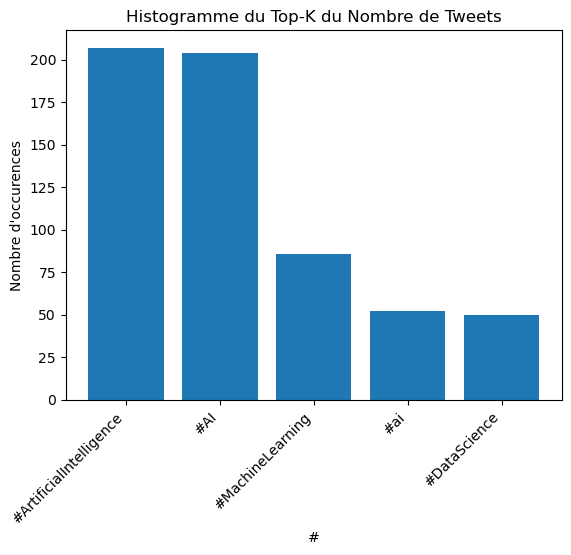

In [71]:
Inpoda(DF=DicoH.TopKH(5)).Histogramme()

# DicoH.TopKH(5) -> à partir de la variable "DicoH" de type 'Inpoda' on élabore le DataFrame contenant les # et leur nombre d'occurences
# Inpoda(DF=DicoH.TopKH(5)) -> on transforme notre 'DataFrame' en 'Inpoda'
# .Histogramme() -> on utilise cet attribut de la classe 'Inpoda' pour afficher l'Histogramme

In [72]:
# Autre Exemple :
#DicoH.TopKH(5) # Affichage 'DataFrame'

In [73]:
# Autre Exemple :
#DFP.TopKH(K=5,DicoH=DicoH.Dico)

- Top K Utilisateurs

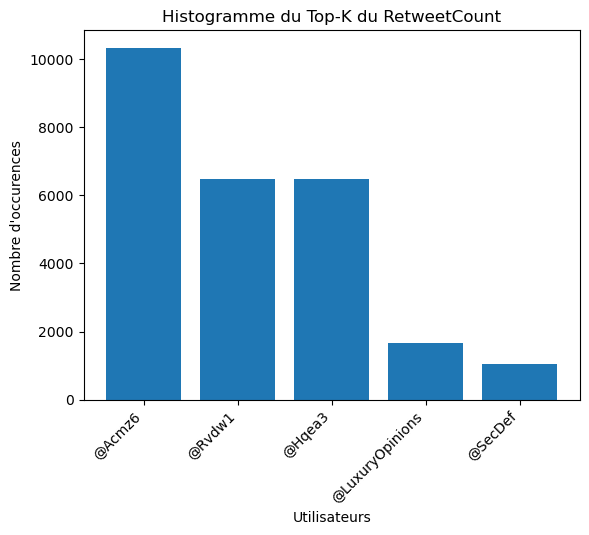

In [74]:
Inpoda(DF=DFP.TopKU(5)).Histogramme()

In [75]:
# Autre exemple :
#DicoA.TopKU(-8, DFP.DF)

- Top K utilisateurs mentionnés

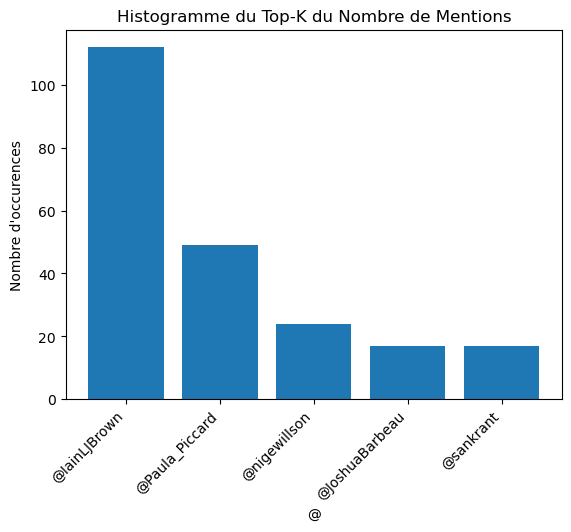

In [76]:
Inpoda(DF=DicoA.TopKA(5)).Histogramme()

In [77]:
# Autre Exemple :
#DFP.TopKA(K=-6,DicoA=DicoA.Dico)

# Le Nombre de publication par Utilisateur/Hashtag

- Le nombre de publications par utilisateur

In [78]:
DFP.NbPostUtilisateur(Utilisateur="@adgpi")

('@adgpi', 27)

- Le nombre de publications par hashtag

In [79]:
DicoH.NbPostHashtags(hashtag= '#AI')

('#AI', 204)

# Les dernières analyses demandées

- L’ensemble de tweets d’un utilisateur spécifique

In [80]:
DFP.TweetsUtilisateur(Utilisateur="@Gizchina")

,Tweets postés par : @Gizchina
0,OPPO releases its first 6G white paper. A syst...
1,"RT @sfchronicle: “Intellectually, I know it’s ..."


- L’ensemble de tweets mentionnant un utilisateur spécifique

In [81]:
DFP.TweetsMentionUtilisateur(Utilisateur="@intratio")

,Tweets mentionnant : @intratio
75,RT @intratio: $MDVL https://t.co/rso4WTkGcW Me...
400,RT @intratio: https://t.co/GGI5g1FRD3 Kinnate ...
843,RT @intratio: $CUE https://t.co/N3KHKWvbdp Cue...


- Les utilisateurs mentionnant un hashtag spécifique

In [82]:
DFP.UtilisateurMentionHashtag(Hashtag='#AI')

,Utilisateurs
4,@nerdgirlz
8,@arXiv_Daily
10,@DecisionsSmart
42,@frontiersin
58,@TACHOUHONER
...,...
1679,@Cvvf1
1681,@Pasd1
1684,@Yjam8
1699,@Apmc2


- Les utilisateurs mentionnés par un utilisateur spécifique

In [83]:
DFP.UtilisateurMentionUtilsateur(Utilisateur="@xoce_q")

,@xoce_q a mentionné :
0,@codewithibrahim


# Interface Graphique de Inpoda

In [84]:
import os
import gramex
import gradio as gr

#Creation d'une liste contenant les informations du dataframe "DFP", pour pouvoir afficher les tweets par la suite
liste_data = [f"{tweet}\n\n------------------------ infos ------------------------\n"
              f"Utilisateur : {user}\nHashtags : {tags}\nUtilisateurs mentionnés : {mention}\nSentiment : {feeling}"
              for tweet, user, tags, mention, feeling in zip(DFP.DF['TweetText'].tolist(), DFP.DF['Utilisateurs'].tolist(),
                                                            DFP.DF['#'], DFP.DF['@'], DFP.DF['Sentiment'])]

def afficher_liste():
    # Retourner le contenu de la liste sous forme de texte
    return liste_data

def afficher_hashtags(entier):
    global val
    val = [f"{hashtag}" for hashtag in zip(DicoH.TopKH(K=entier)['#'].tolist())]
    return "Les " + str(entier) + " les plus fréquents sont les suivants : " + val

#Creation de 1708 textboxes pour y stocker les txeets
composants_texte = [gr.Textbox() for _ in liste_data]


# Ici 2 blocks différenst sont utilisés pour afficher les éléments de manière optimale et claire
#Le premier block se nomme iface et sert uniquement à l'affichage des 1708 tweets
with gr.Blocks() as iface:
    gr.Markdown(value="# Analyse de tweets")
    for i, elt in enumerate(composants_texte):
        txt = gr.Textbox(label=("Tweet n°"+ str(i)), value=liste_data[i])

#Le deuxième block se nomme analyse, est interactive et sert à afficher le résultats des fonctions dites secondaires c'est à dire les Top(K) et autres
with gr.Blocks() as analyse:
    gr.Markdown(value="# Analyses plus profondes sur la base de données entière")

    #Ici on fait plusieurs sous catégories, une pour chacune des fonctions

    gr.Markdown(value="## Top K hastags")
    with gr.Row():
        txt1 = gr.Textbox(label="Veuillez entrer un entier compris entre 1 et 1708")
        reponse1 = gr.Textbox(value ="", label ="Réponse")
    btn1 = gr.Button(value = "Submit")
    btn1.click(afficher_hashtags, inputs=[txt1], outputs=[reponse1])

    gr.Markdown(value="## Top K @")
    with gr.Row():
        txt2 = gr.Textbox(label="Veuillez entrer un entier compris entre 1 et 1708")
        reponse2 = gr.Textbox(value ="", label ="Réponse")
    btn2 = gr.Button(value = "Submit")
    btn2.click(afficher_hashtags, inputs=[txt2], outputs=[reponse2])

    gr.Markdown(value="## Top K @ mentionnés")
    with gr.Row():
        txt3 = gr.Textbox(label="Veuillez entrer un entier compris entre 1 et 1708")
        reponse3 = gr.Textbox(value ="", label ="Réponse")
    btn2 = gr.Button(value = "Submit")
    btn2.click(afficher_hashtags, inputs=[txt3], outputs=[reponse3])

    gr.Markdown(value="## Nombre de publications par utilisateur")
    with gr.Row():
        txt4 = gr.Textbox(label="Veuillez entrer un nom d'utilisateur sous la forme suivante : @name")
        reponse4 = gr.Textbox(value ="", label ="Réponse")
    btn2 = gr.Button(value = "Submit")
    btn2.click(afficher_hashtags, inputs=[txt4], outputs=[reponse4])

    gr.Markdown(value="## Nombre de publications par hashtags")
    with gr.Row():
        txt5 = gr.Textbox(label="Veuillez entrer un nom d'utilisateur sous la forme suivante : @name")
        reponse5 = gr.Textbox(value ="", label ="Réponse")
    btn2 = gr.Button(value = "Submit")
    btn2.click(afficher_hashtags, inputs=[txt5], outputs=[reponse5])

    gr.Markdown(value="## Ensemble de tweets de l'utilisateur entré")
    with gr.Row():
        txt6 = gr.Textbox(label="Veuillez entrer un nom d'utilisateur sous la forme suivante : @name")
        reponse6 = gr.Textbox(value ="", label ="Réponse")
    btn2 = gr.Button(value = "Submit")
    btn2.click(afficher_hashtags, inputs=[txt6], outputs=[reponse6])

    gr.Markdown(value="## Ensemble de tweets mentionnant l'utilisateur entré")
    with gr.Row():
        txt7 = gr.Textbox(label="Veuillez entrer un nom d'utilisateur sous la forme suivante : @name")
        reponse7 = gr.Textbox(value ="", label ="Réponse")
    btn2 = gr.Button(value = "Submit")
    btn2.click(afficher_hashtags, inputs=[txt7], outputs=[reponse7])

    gr.Markdown(value="## Les utilisateurs mentionnant l'hashtag donné en entrée")
    with gr.Row():
        txt8 = gr.Textbox(label="Veuillez entrer un nom d'utilisateur sous la forme suivante : @name")
        reponse8 = gr.Textbox(value ="", label ="Réponse")
    btn2 = gr.Button(value = "Submit")
    btn2.click(afficher_hashtags, inputs=[txt8], outputs=[reponse8])

    gr.Markdown(value="## Les utilisateurs mentionnés par l'utilisateur donné en entrée")
    with gr.Row():
        txt9 = gr.Textbox(label="Veuillez entrer un nom d'utilisateur sous la forme suivante : @name")
        reponse9 = gr.Textbox(value ="", label ="Réponse")
    btn2 = gr.Button(value = "Submit")
    btn2.click(afficher_hashtags, inputs=[txt9], outputs=[reponse9])

# On lance tout l'affichage par cette commande
if __name__ == "__main__":
    iface.launch() and analyse.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


# Ressources suplémentaires
Des ressources suplémentaire sont disponible sur le Github dont le lien est ci dessous. Vous y trouverez notamment un diagramme détaillant le fonctionnement de **InPoDa** ainsi que le détail de la répartition des taches.

**Github** : https://github.com/LugolBis/Projet-IN304 


# *Références*
- Chat-GPT
- Documentation de ```Pandas``` : https://pandas.pydata.org/docs/user_guide/index.html
- Documentation de ```Gradio``` : https://www.gradio.app/docs/interface